In [50]:
import cv2
import numpy as np
from matplotlib import pyplot as plt


In [51]:
GIRAFFE = cv2.cvtColor(cv2.imread("./lectures/edge_detection/giraffe.jpg"), cv2.COLOR_BGR2RGB)
plt.imshow(GIRAFFE)

error: OpenCV(4.6.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'


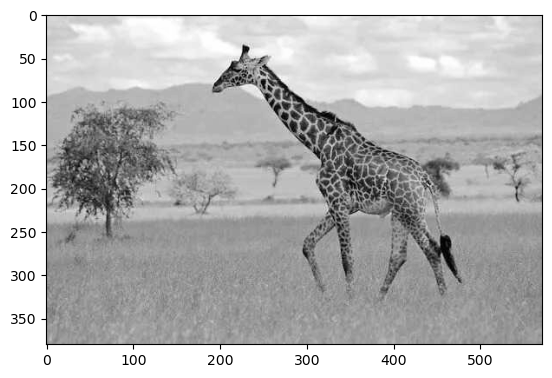

In [ ]:
GIRAFFE_GRAYSCALE = cv2.cvtColor(GIRAFFE, cv2.COLOR_RGB2GRAY)
plt.imshow(GIRAFFE_GRAYSCALE, cmap="gray")

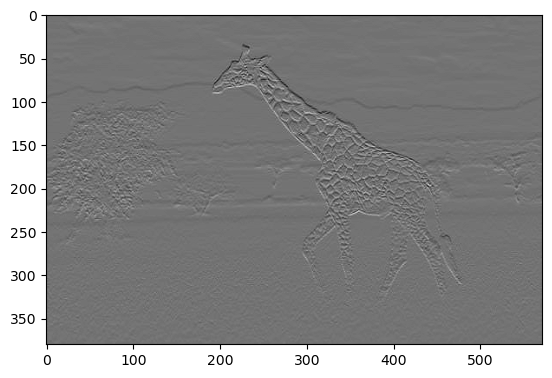

In [ ]:
discrete_x_derivative = np.array([-1, 1])
GIRAFFE_X_DERIVATIVE = cv2.filter2D(GIRAFFE_GRAYSCALE, ddepth=3, kernel=discrete_x_derivative)
plt.imshow(GIRAFFE_X_DERIVATIVE, cmap="gray")

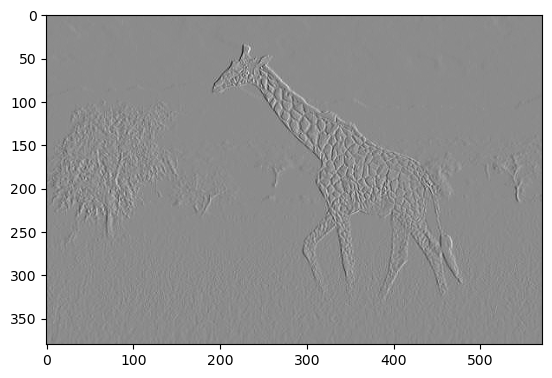

In [ ]:
discrete_y_derivative = np.array([[-1, 1]])
GIRAFFE_Y_DERIVATIVE = cv2.filter2D(GIRAFFE_GRAYSCALE, ddepth=3, kernel=discrete_y_derivative)
plt.imshow(GIRAFFE_Y_DERIVATIVE, cmap="gray")

C:\Users\Aleksander\AppData\Local\Temp\ipykernel_2060\86235469.py:1: RuntimeWarning: invalid value encountered in sqrt
  DERRIVATIVE_STRENGHT = np.sqrt(np.square(GIRAFFE_X_DERIVATIVE) + np.square(GIRAFFE_Y_DERIVATIVE))


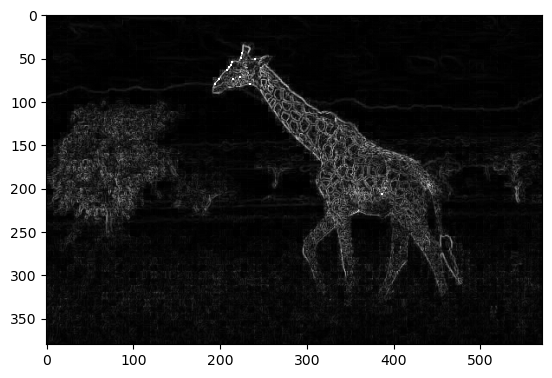

In [ ]:
DERRIVATIVE_STRENGHT = np.sqrt(np.square(GIRAFFE_X_DERIVATIVE) + np.square(GIRAFFE_Y_DERIVATIVE))
plt.imshow(DERRIVATIVE_STRENGHT, cmap="gray")

In [ ]:
N = 3
O = 5
discrete_x_derivative_blurred = np.convolve(cv2.gausian(N-1, O).reshape(-1), discrete_x_derivative)
discrete_y_derivative_blurred = np.convolve(cv2.getGaussianKernel(N-1, O).reshape(-1), discrete_y_derivative.reshape(-1)).reshape(N, 1)

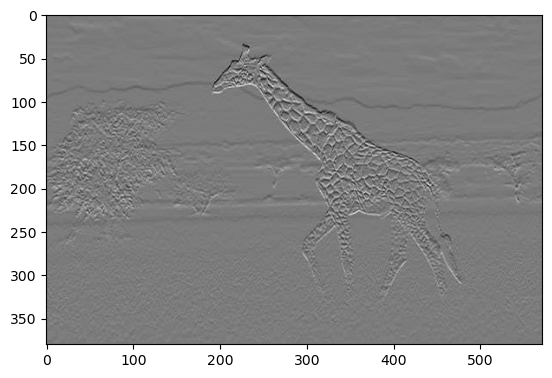

In [ ]:
GIRAFFE_X_DERIVATIVE_BLURRED = cv2.filter2D(GIRAFFE_GRAYSCALE, ddepth=3, kernel=discrete_x_derivative_blurred)
plt.imshow(GIRAFFE_X_DERIVATIVE_BLURRED, cmap="gray")

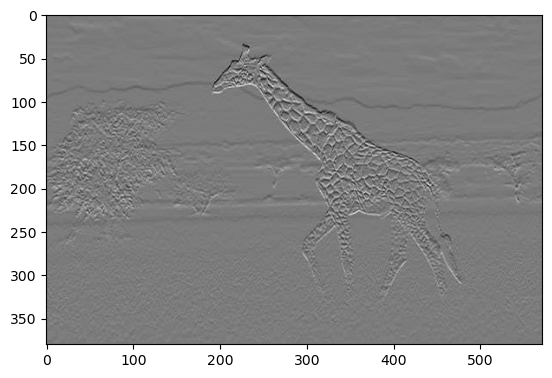

In [ ]:
GIRAFFE_Y_DERIVATIVE_BLURRED = cv2.filter2D(GIRAFFE_GRAYSCALE, ddepth=3, kernel=discrete_y_derivative_blurred)
plt.imshow(GIRAFFE_Y_DERIVATIVE_BLURRED, cmap="gray")

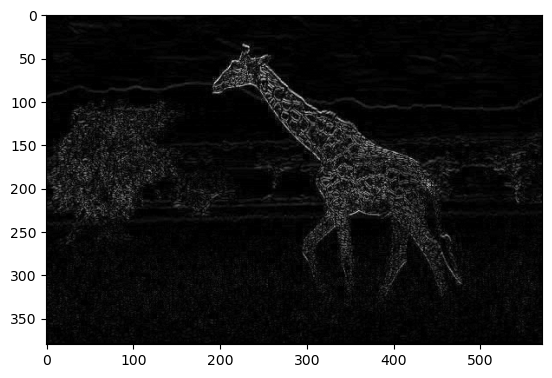

In [ ]:
DERRIVATIVE_BLURRED_STRENGHT = np.sqrt(np.square(GIRAFFE_X_DERIVATIVE_BLURRED) + np.square(GIRAFFE_Y_DERIVATIVE_BLURRED))
plt.imshow(DERRIVATIVE_BLURRED_STRENGHT, cmap="gray")

In [52]:
sobel_x_derivative = np.array([ [-1, 0, 1],
                              [-2, 0, 2],
                              [-1, 0, 1] ])
sobel_y_derivative = -np.transpose(sobel_x_derivative)

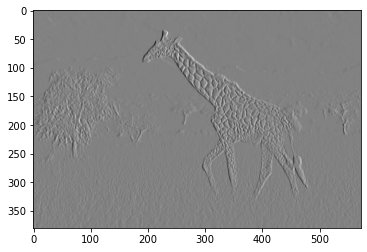

In [63]:
GIRAFFE_BY_SOBEL_X = cv2.filter2D(GIRAFFE_GRAYSCALE, ddepth=3, kernel=sobel_x_derivative)
plt.imshow(GIRAFFE_BY_SOBEL_X, cmap="gray")

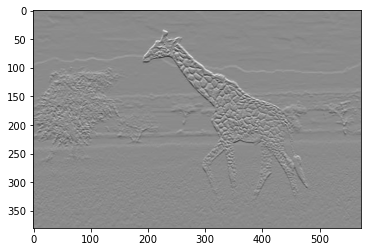

In [54]:
GIRAFFE_BY_SOBEL_Y = cv2.filter2D(GIRAFFE_GRAYSCALE, ddepth=3, kernel=sobel_y_derivative)
plt.imshow(GIRAFFE_BY_SOBEL_Y, cmap="gray")

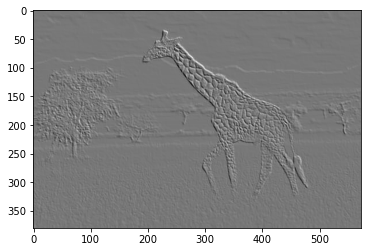

In [55]:
JOINED_SOBEL_GIRAFFE = (GIRAFFE_BY_SOBEL_X + GIRAFFE_BY_SOBEL_Y) / 2
plt.imshow(JOINED_SOBEL_GIRAFFE, cmap="gray")

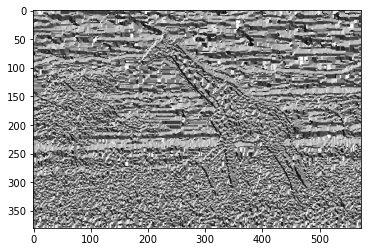

In [95]:
SOBEL_AGNLES = np.arctan2(GIRAFFE_BY_SOBEL_Y, GIRAFFE_BY_SOBEL_X)
plt.imshow(SOBEL_AGNLES, cmap="gray")

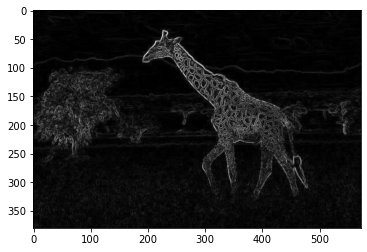

In [91]:
GIRAFFE_BY_SOBEL_X = GIRAFFE_BY_SOBEL_X.astype(np.float64)
GIRAFFE_BY_SOBEL_Y = GIRAFFE_BY_SOBEL_Y.astype(np.float64)
SOBEL_MAGNITUDE = np.sqrt(np.square(GIRAFFE_BY_SOBEL_X) + np.square(GIRAFFE_BY_SOBEL_Y))
plt.imshow(SOBEL_MAGNITUDE, cmap="gray")

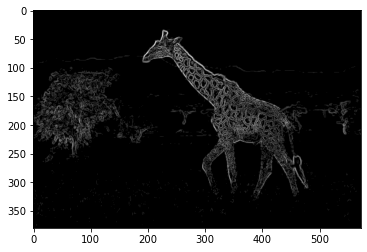

In [92]:
SOBEL_MAGNITUDE_THRESHOLDED = SOBEL_MAGNITUDE.copy()
SOBEL_MAGNITUDE_THRESHOLDED[SOBEL_MAGNITUDE_THRESHOLDED < 100] = 0
plt.imshow(SOBEL_MAGNITUDE_THRESHOLDED, cmap="gray")

In [106]:
LOCAL_MAXIMA = np.zeros_like(GIRAFFE_GRAYSCALE)
rows, columns = LOCAL_MAXIMA.shape


for i in range(rows):
    for j in range(columns):
        x_force = np.cos(SOBEL_AGNLES[i, j])
        y_force = np.sin(SOBEL_AGNLES[i, j])

        x_change = np.sign(x_force)
        y_change = np.sign(y_force)

        mean = [0, 0]
        for x_c in [0, x_change]:
            for y_c in [0, y_change]:
                

        
        
        if pointOne < currPoint > pointTwo:
            LOCAL_MAXIMA[i, j] = 1


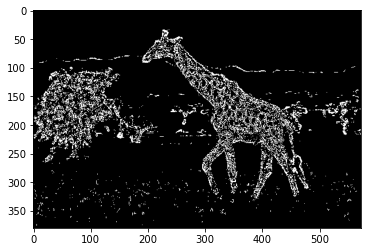

In [107]:
plt.imshow(LOCAL_MAXIMA, cmap="gray")